In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt


low_rate_data_path = "Sohn B Raven LR_01-18-2026_14_03_50.csv"
high_rate_data_path = "Sohn B Raven HR_01-18-2026_14_03_50.csv"

gps_data_path = "2026-01-18-Log.csv"


LRdata = pd.read_csv(low_rate_data_path)
HRdata = pd.read_csv(high_rate_data_path)
GPSdata = pd.read_csv(gps_data_path)
#print(LRdata)

print(HRdata.columns)
print(LRdata.columns)
print(GPSdata.columns)
plt.style.use('dark_background')


Index(['Year', 'Month', 'Day', 'Time', 'Flight_Time_(s)', 'Sync', 'Gyro_X',
       'Gyro_Y', 'Gyro_Z', 'Accel_X', 'Accel_Y', 'Accel_Z', 'Quat_1', 'Quat_2',
       'Quat_3', 'Quat_4', 'Aux_Volts', 'Current'],
      dtype='object')
Index(['Year', 'Month', 'Day', 'Time', 'Flight_Time_(s)', 'Sync',
       'Temperature_(F)', 'Baro_Press_(atm)', 'Baro_Altitude_ASL_(feet)',
       'Baro_Altitude_AGL_(feet)',
       ...
       'GT_FUTANG.3', 'LT_TVAL1.3', 'GT_TVAL2.3', 'LT_VEL1.3', 'GT_VEL2.3',
       'LT_BVEL1.3', 'GT_BURN.3', 'Armed.3', 'Reserved.7', 'Reserved.8'],
      dtype='object', length=101)
Index(['TRACKER', 'DATE', 'TIME', 'LAT', 'LON', 'ALT', 'FIX', 'HORZV', 'VERTV',
       'HEAD', 'FLAGS', '#TOT', '>40', '>32', '>24', 'RSSI', 'BATT'],
      dtype='object')


    height  pressure  temperature     wind_u     wind_v
0      230     92500        286.8   2.238265   0.996328
1      460     90000        285.5   2.797314   0.801957
2      937     85000        284.5  -0.000116  -0.130000
3     1443     80000        284.3   0.261134  -2.506434
4     1979     75000        282.7   1.678324  -4.624892
5     2547     70000        279.5   0.875793  -4.993785
6     3150     65000        275.7   1.364142  -5.493152
7     3790     60000        271.0   2.011129  -6.600406
8     4474     55000        265.6   1.281732  -7.308458
9     5207     50000        259.7  -0.989194  -7.999068
10    6000     45000        253.6  -0.334198  -9.334019
11    6862     40000        246.9   0.601314 -11.674524
12    7811     35000        239.2   0.920611 -13.338267
13    8870     30000        230.5   0.721165 -14.001440
14   10074     25000        220.5   0.281524 -16.997669
15   11499     20000        218.5   4.602363 -10.364065
16   13316     15000        210.5  13.951564  -8

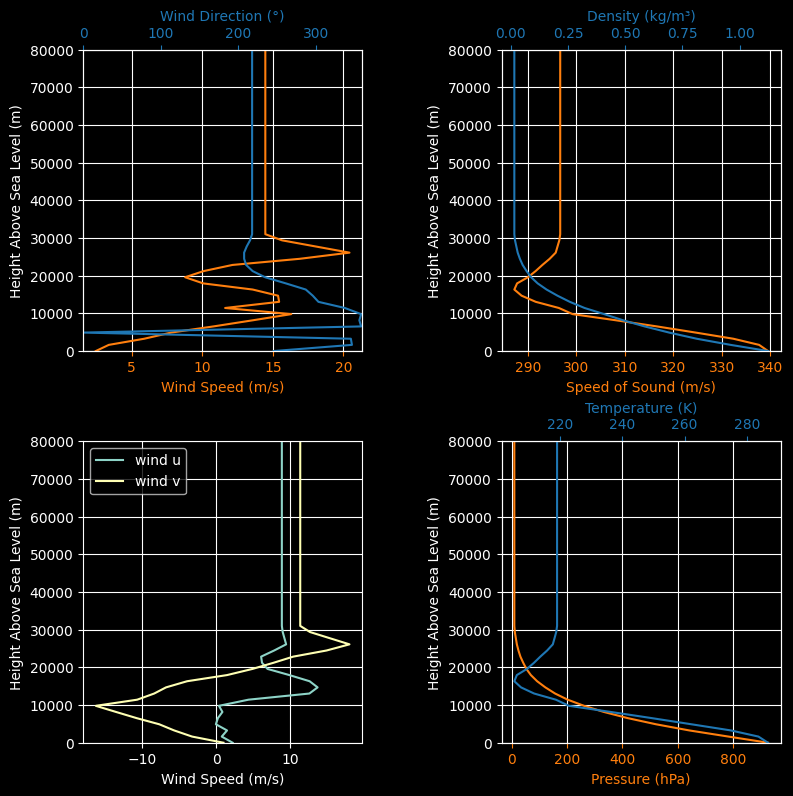

In [2]:
from rocketpy import Environment,Function


# Load the .csv file into the environment
df = pd.read_csv('vertical_profile_2026-01-15_14PST copy.csv')
#df = pd.read_csv('atmodata.csv')

print(df)

# Create Function objects to represent the profiles
env = Environment()

pressure_func = list(zip(df['height'], df['pressure']))

print(pressure_func)

wind_u_func = list(zip(df['height'], df['wind_u']))
wind_v_func = list(zip(df['height'], df['wind_v']))

print(wind_u_func)
print(wind_v_func)

temperature_func = list(zip(df['height'], df['temperature']))

print(temperature_func)

# Set up the environment

env.set_atmospheric_model(
    type="custom_atmosphere",
    pressure=pressure_func,
    temperature=temperature_func,
    wind_u=wind_u_func,
    wind_v=wind_v_func,
)

env.plots.atmospheric_model()


In [3]:
NormalizedVelocity = np.sqrt((LRdata['Velocity_Up']*LRdata['Velocity_Up'])+((LRdata['Velocity_DR']*LRdata['Velocity_DR']))+(LRdata['Velocity_CR']*LRdata['Velocity_CR']))
MachNumber = (NormalizedVelocity/3.281)/(env.speed_of_sound(LRdata['Inertial_Altitude']/3.281))


MissionTimeLR = LRdata['Flight_Time_(s)']
MissionTimeHR = HRdata['Flight_Time_(s)']

#Integrate velocity
timecutoff = 7.46

# X_accel_icareabout = HRdata[HRdata['Flight_Time_(s)'] < timecutoff]['Accel_X']
# Velocity_X = np.trapezoid(X_accel_icareabout*9.8065,dx=0.002)
# print(X_accel_icareabout[-1:])
# print(Velocity_X)

# Y_accel_icareabout = HRdata[HRdata['Flight_Time_(s)'] < timecutoff]['Accel_Y']
# Velocity_Y = np.trapezoid((Y_accel_icareabout*9.8065)-9.81,dx=0.002)
# print(Y_accel_icareabout[-1:])
# print(Velocity_Y)

# Z_accel_icareabout = HRdata[HRdata['Flight_Time_(s)'] < timecutoff]['Accel_Z']
# Velocity_Z = np.trapezoid(Z_accel_icareabout*9.8065,dx=0.002)
# print(Z_accel_icareabout[-1:])
# print(Velocity_Z)

# NormalizedRecalcedVelocity = np.sqrt((Velocity_X**2)+(Velocity_Y**2)+(Velocity_Z**2))
# print(NormalizedRecalcedVelocity*3.281)

# maxvalt = LRdata[LRdata['Flight_Time_(s)'] == timecutoff ]['Baro_Altitude_AGL_(feet)']/3.281
# print("max v alt= " + str(maxvalt))

#maxmach = NormalizedRecalcedVelocity/env.speed_of_sound(maxvalt)
#print(maxmach)


#TO DO
AxialAcceleration = np.sqrt((HRdata['Accel_X']**2) + (HRdata['Accel_Y']**2) + (HRdata['Accel_Z']**2))


#


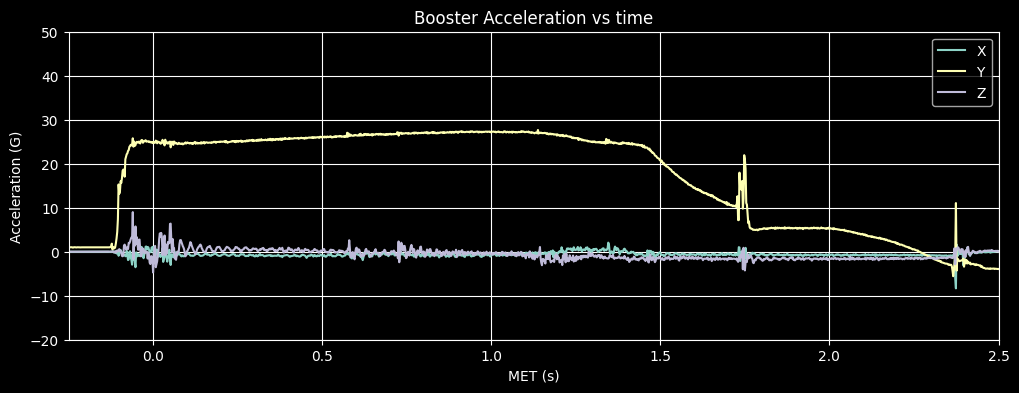

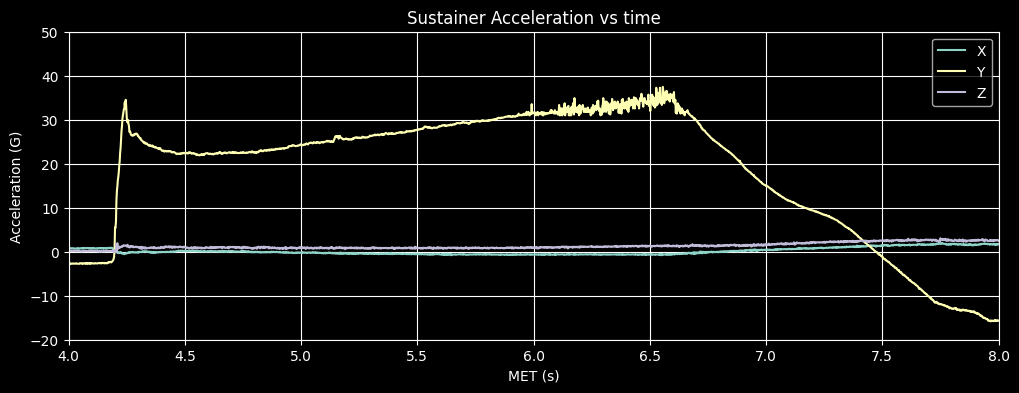

In [4]:
#plot motor accel
fig, ax = plt.subplots()

ax.plot('Flight_Time_(s)','Accel_X',data=HRdata,label="X")
ax.plot('Flight_Time_(s)','Accel_Y',data=HRdata,label="Y")
ax.plot('Flight_Time_(s)','Accel_Z',data=HRdata,label="Z")

ax.set(xlabel='MET (s)', ylabel='Acceleration (G)',
       title='Booster Acceleration vs time')
ax.grid()

ax.set_xlim(-0.25,2.5)
ax.set_ylim(-20,50)
ax.legend()

fig.set_size_inches(12,4)


#SUSTAINER
fig, ax = plt.subplots()

ax.plot('Flight_Time_(s)','Accel_X',data=HRdata,label="X")
ax.plot('Flight_Time_(s)','Accel_Y',data=HRdata,label="Y")
ax.plot('Flight_Time_(s)','Accel_Z',data=HRdata,label="Z")

ax.set(xlabel='MET (s)', ylabel='Acceleration (G)',
       title='Sustainer Acceleration vs time')
ax.grid()

ax.set_xlim(4,8)
ax.set_ylim(-20,50)
ax.legend()

fig.set_size_inches(12,4)

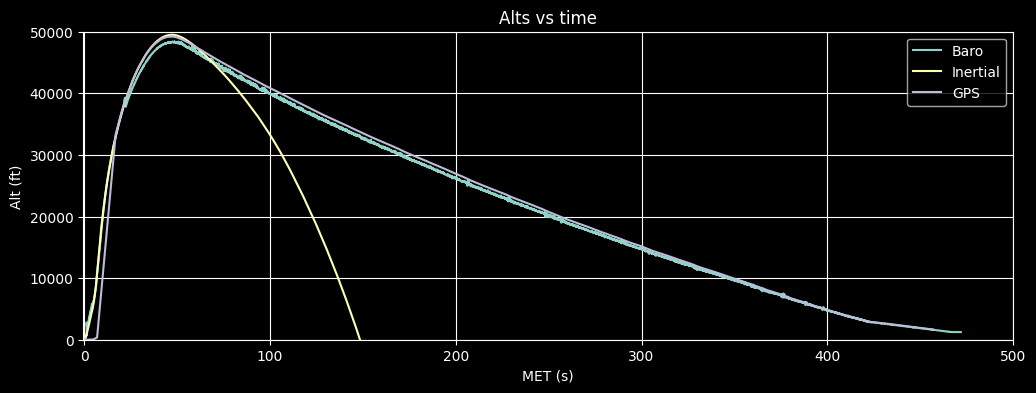

In [5]:

fig, ax = plt.subplots()



GPStime = pd.to_datetime(GPSdata['DATE']+ " " + GPSdata['TIME'], format='%Y-%m-%d %H:%M:%S.%f')
#print(GPStime)
launchalt = GPSdata['ALT'][0]
Launchtime = dt.datetime(2026,1,18,14,3,51)

GPStimeadj = GPStime-Launchtime
GPSmissiontime = GPStimeadj.astype('timedelta64[s]')

# print(GPSmissiontime)
# print(GPSdata['ALT'])



ax.plot('Flight_Time_(s)','Baro_Altitude_AGL_(feet)',data=LRdata,label="Baro")
ax.plot('Flight_Time_(s)','Inertial_Altitude',data=LRdata, label="Inertial")
ax.plot(GPSmissiontime,GPSdata['ALT']-launchalt,label="GPS")

ax.set(xlabel='MET (s)', ylabel='Alt (ft)',
       title='Alts vs time')
ax.grid()
ax.set_ylim(0,50000)
ax.set_xlim(-0.5,500)
ax.legend()
fig.set_size_inches(12,4)

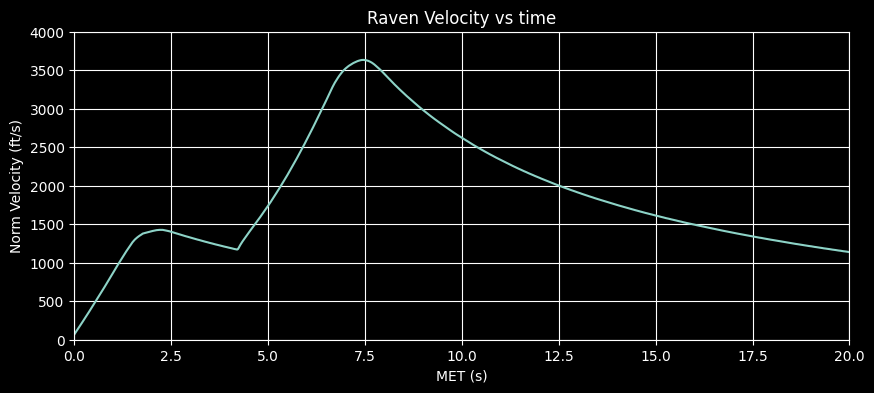

In [6]:
#absolute velocity
fig, ax = plt.subplots()

ax.plot(MissionTimeLR,NormalizedVelocity)

ax.set(xlabel='MET (s)', ylabel='Norm Velocity (ft/s)',
       title='Raven Velocity vs time')
ax.set_xlim(0,20)
ax.set_ylim(0,4000)
ax.grid()

fig.set_size_inches(10,4)

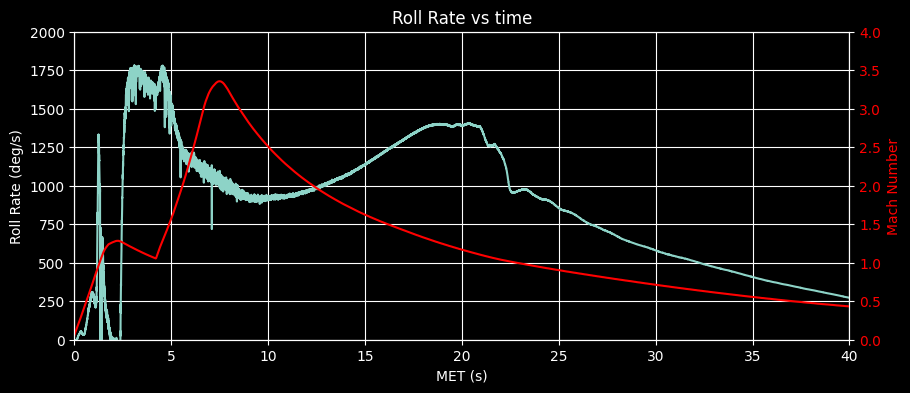

In [9]:
#roll rate vs mach 
fig, ax = plt.subplots()

ax.plot('Flight_Time_(s)','Gyro_Y',data=HRdata,label="RollRate")


ax.set(xlabel='MET (s)', ylabel='Roll Rate (deg/s)',
       title='Roll Rate vs time')
ax.set_xlim(0,40)
ax.set_ylim(0,2000)
ax.grid()

ax2 = ax.twinx()
ax2.set_ylabel("Mach Number",color="red")
ax2.plot(MissionTimeLR,MachNumber,color = "red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylim(0,4)


fig.set_size_inches(10,4)

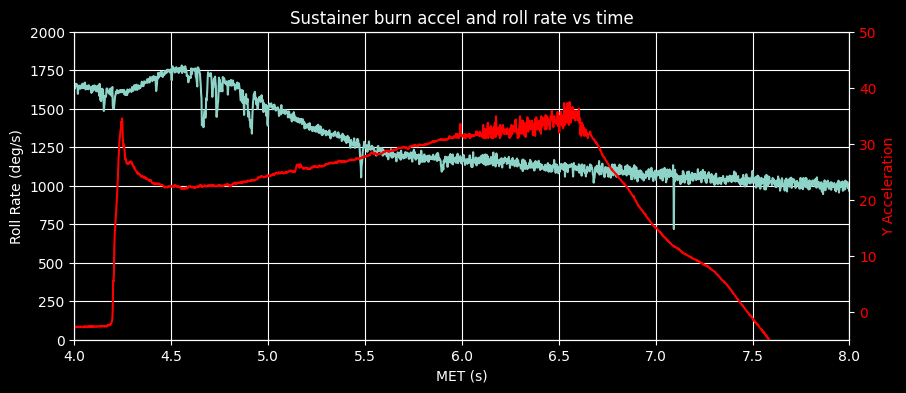

In [12]:
#roll rate vs mach 
fig, ax = plt.subplots()

ax.plot('Flight_Time_(s)','Gyro_Y',data=HRdata,label="RollRate")


ax.set(xlabel='MET (s)', ylabel='Roll Rate (deg/s)',
       title='Sustainer burn accel and roll rate vs time')
ax.set_xlim(4,8)
ax.set_ylim(0,2000)
ax.grid()

ax2 = ax.twinx()
ax2.set_ylabel("Y Acceleration",color="red")
ax2.plot('Flight_Time_(s)','Accel_Y',data=HRdata,label="Acceleration",color="Red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylim(-5,50)


fig.set_size_inches(10,4)